<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/2_CNN_12epohs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.8.0


In [4]:
np.random.seed(19)

In [5]:
df=pd.read_csv("combinedSample_GoldDs.csv")

In [6]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [7]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [8]:
df.shape

(371279, 15)

In [9]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [10]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [11]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,64608.9986,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,71534.9987,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,38320.0012,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,26130.0001,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,30500.0003,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [12]:
#data.isna.isany()
#data['open'].plot(figsize=(15,6))

In [13]:

#normalization
data=(data-data.min())/(data.max()-data.min())

In [14]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,0.021363,0.038988,0.125967,0.130772,0.137818,0.140713
1,0.023653,0.051443,0.129923,0.131973,0.141810,0.143297
2,0.012671,0.038068,0.132383,0.132824,0.144124,0.144349
3,0.008640,0.023132,0.133379,0.132849,0.142495,0.142133
4,0.010085,0.031235,0.131034,0.130764,0.140916,0.140899


In [15]:
np.random.seed(19)

In [16]:
print(data.head(n=5))
print(data[-5:])

   Volume_Bid  Volume_Ask      Open      High       Low     Close
0    0.021363    0.038988  0.125967  0.130772  0.137818  0.140713
1    0.023653    0.051443  0.129923  0.131973  0.141810  0.143297
2    0.012671    0.038068  0.132383  0.132824  0.144124  0.144349
3    0.008640    0.023132  0.133379  0.132849  0.142495  0.142133
4    0.010085    0.031235  0.131034  0.130764  0.140916  0.140899
        Volume_Bid  Volume_Ask      Open      High       Low     Close
371274    0.003809    0.012897  0.785339  0.786228  0.793662  0.789447
371275    0.003402    0.015334  0.786724  0.788796  0.794671  0.793563
371276    0.001270    0.002914  0.790729  0.790754  0.798524  0.795500
371277    0.001746    0.007565  0.792612  0.790772  0.800340  0.794850
371278    0.001696    0.004352  0.792190  0.791118  0.800259  0.795753


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float64
 1   Volume_Ask  371279 non-null  float64
 2   Open        371279 non-null  float64
 3   High        371279 non-null  float64
 4   Low         371279 non-null  float64
 5   Close       371279 non-null  float64
dtypes: float64(6)
memory usage: 17.0 MB


In [18]:
#downsizing
data['Volume_Bid']=pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']=pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float32
 1   Volume_Ask  371279 non-null  float32
 2   Open        371279 non-null  float32
 3   High        371279 non-null  float32
 4   Low         371279 non-null  float32
 5   Close       371279 non-null  float32
dtypes: float32(6)
memory usage: 8.5 MB


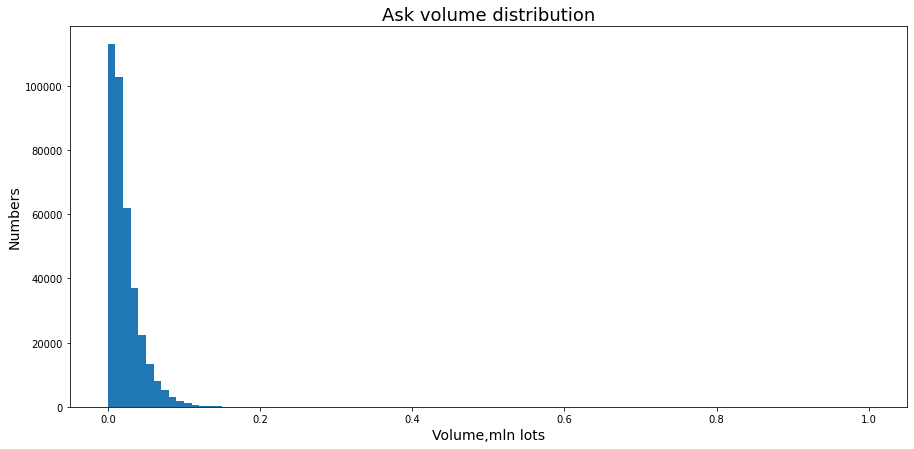

In [19]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [20]:
n=data.shape[0]
p=data.shape[1]

#one week data
n_small=300000
data_a=np.array(data[:n_small])
print("data_a:")
print(data_a[:4])
print('\n')
print(data_a[-4:])
print('\n',"Tick number in the DataFrame: n_small=",n_small,'\n')
print("numpy size:                                =",data_a.shape)

data_a:
[[0.02136336 0.03898769 0.12596732 0.13077244 0.1378183  0.14071327]
 [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
 [0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
 [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]]


[[0.00307841 0.00886966 0.38873526 0.38756987 0.3988671  0.3965383 ]
 [0.00436135 0.01061305 0.38878253 0.38825828 0.39923924 0.3971953 ]
 [0.00365044 0.00701174 0.38944283 0.38814354 0.39935482 0.3966026 ]
 [0.01140102 0.01618045 0.38875315 0.38739648 0.39775455 0.39564416]]

 Tick number in the DataFrame: n_small= 300000 

numpy size:                                = (300000, 6)


In [21]:
data=[]
data

[]

In [22]:
N=50
L=n_small-N
print('Size of a three-dimensional data tensor: ',L,N,6)

Size of a three-dimensional data tensor:  299950 50 6


In [23]:
from tqdm import tqdm

In [24]:
data_b=np.zeros((L,N,6),dtype='float64')
Y=np.zeros((L,4),dtype='float64')

In [25]:
print('n_small-N=',n_small-N)

n_small-N= 299950


In [26]:
print('n_small-N=',n_small-N)
for k in tqdm(range(n_small-N)):
    data_b[k,:,:]=data_a[k:k+N,:]
    Y[k,0]=data_a[k+N,2]
    Y[k,1]=data_a[k+N,3]
    Y[k,2]=data_a[k+N,4]
    Y[k,3]=data_a[k+N,5]
print(k)
print('data_b:','\n',data_b)
print("Numpy size:",data_b.shape,'\n')
print(Y[:5,:])
print(Y[-10:,:])
print("Numpy size:",Y.shape)

n_small-N= 299950


100%|██████████| 299950/299950 [00:01<00:00, 224574.92it/s]

299949
data_b: 
 [[[0.02136336 0.03898769 0.12596732 0.13077244 0.13781831 0.14071327]
  [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  ...
  [0.01228387 0.01943817 0.12703635 0.12626846 0.13735728 0.13696404]
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]]

 [[0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]
  ...
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
  [0.01111005 0.01969904 0.12513331 0.12466217 0.13600594 0.13570294]]

 [[0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463

In [27]:
data_a=[]
data_a

[]

In [28]:
import random 
pp=random.randint(10,n_small-N-1)
print('random int = ',pp)
print('data_b','\t\t\t\t\t\t\t\t','Y:')
print('Open','\t\t','High','\t\t','low','\t\t','close','\t\t','Open','\t\t','High','\t\t','low','\t\t','close')
for i in range(7):
    print(data_b[pp+i,N-1,2],'\t',data_b[pp+i,N-1,3],'\t',data_b[pp+i,N-1,4],'\t',data_b[pp+i,N-1,5],'\t',
          Y[pp+i,0],'\t',Y[pp+i,1],'\t',Y[pp+i,2],'\t',Y[pp+i,3])

random int =  47152
data_b 								 Y:
Open 		 High 		 low 		 close 		 Open 		 High 		 low 		 close
0.2654896676540375 	 0.2651819884777069 	 0.2767314016819 	 0.2753392457962036 	 0.26605165004730225 	 0.26498693227767944 	 0.2770616114139557 	 0.27522194385528564
0.26605165004730225 	 0.26498693227767944 	 0.2770616114139557 	 0.27522194385528564 	 0.2659239172935486 	 0.26529672741889954 	 0.27709081768989563 	 0.275704950094223
0.2659239172935486 	 0.26529672741889954 	 0.27709081768989563 	 0.275704950094223 	 0.2664003372192383 	 0.2661598026752472 	 0.2774845361709595 	 0.2765587270259857
0.2664003372192383 	 0.2661598026752472 	 0.2774845361709595 	 0.2765587270259857 	 0.2672649919986725 	 0.26627835631370544 	 0.2781195640563965 	 0.27649566531181335
0.2672649919986725 	 0.26627835631370544 	 0.2781195640563965 	 0.27649566531181335 	 0.2673633396625519 	 0.2666187286376953 	 0.2785945534706116 	 0.27695342898368835
0.2673633396625519 	 0.2666187286376953 	 0.2785945534706116

In [29]:
print('\t','\t Max \t\t Min')
mnx=data_b[:,:,0].max()
mmn=data_b[:,:,0].min()
print('Volume_bid','\t',mnx,'\t\t',mmn)
mnx=data_b[:,:,1].max()
mmn=data_b[:,:,1].min()
print('Volume_Ask','\t',mnx,'\t',mmn)
mnx=data_b[:,:,2].max()
mmn=data_b[:,:,2].min()
print('Open','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,3].max()
mmn=data_b[:,:,3].min()
print('High','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,4].max()
mmn=data_b[:,:,4].min()
print('Low','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,5].max()
mmn=data_b[:,:,5].min()
print('Close','\t\t',mnx,'\t',mmn)

	 	 Max 		 Min
Volume_bid 	 1.0 		 0.0
Volume_Ask 	 0.8096268177032471 	 0.0
Open 		 0.609148383140564 	 0.0
High 		 0.6074926853179932 	 0.0
Low 		 0.6172917485237122 	 0.0
Close 		 0.6140284538269043 	 0.0


In [30]:
train_start=0
train_end=int(np.floor(0.9*L))
print(L,train_end)

299950 269955


In [31]:

train_end_=4955
print(train_end)

269955


In [32]:
test_start=train_end+1
test_end=L
print(test_start,test_end)

269956 299950


In [33]:
print(test_end-train_end)

29995


In [34]:
X_train=np.zeros((train_end,N,6),dtype='float32')
X_test=np.zeros((test_end-train_end,N,6),dtype='float32')
for z in tqdm(range(test_end)):
    if z<train_end:
        X_train[z,:,:]=data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]=data_b[z,:,:]
print('\n',"X_train:",X_train.shape,'\n')
print("X_test:",X_test.shape,'\n')

100%|██████████| 299950/299950 [00:00<00:00, 568161.14it/s]


 X_train: (269955, 50, 6) 

X_test: (29995, 50, 6) 



In [35]:
print(X_train[:5,N-1,:])
print(X_train[-5:,N-1,:],'\n')
print(X_test[:5,N-1,:])
print(X_test[-5:,N-1,:])

[[0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
 [0.01111005 0.01969904 0.1251333  0.12466217 0.13600594 0.13570294]
 [0.01439015 0.02555913 0.12466074 0.12425422 0.13617106 0.13584165]
 [0.01003541 0.01736392 0.12476292 0.12463667 0.13666637 0.13653526]
 [0.00501605 0.00780072 0.12542707 0.12495538 0.13715407 0.13676226]]
[[0.0076613  0.00948048 0.2323678  0.2315353  0.24371897 0.24213076]
 [0.00959895 0.0104858  0.23243167 0.2315009  0.24123093 0.23995788]
 [0.01142748 0.03139376 0.23020932 0.23121278 0.24164878 0.2418243 ]
 [0.00649739 0.01182833 0.2321162  0.23142695 0.24288073 0.24140814]
 [0.00961879 0.01159291 0.23169471 0.231353   0.24263942 0.2411597 ]] 

[[0.00440434 0.01154837 0.23138435 0.23072834 0.24242732 0.24074355]
 [0.01333867 0.01464066 0.23101397 0.23030764 0.24136049 0.24007516]
 [0.00531364 0.01544873 0.23033832 0.22975947 0.24137318 0.24055059]
 [0.0052938  0.01591957 0.23073426 0.22967151 0.23995072 0.24010038]
 [0.00585261 0.01920275 0.2304

In [36]:
y_train=Y[np.arange(train_start,train_end),:]
y_test=Y[np.arange(test_start,L),:]

print(train_start,train_end,test_start,L,'\n')
print('y_train(first 10):','\n',y_train[:10,:])

data_add_row=np.array([y_test[L-test_start-1,0],y_test[L-test_start-1,1],y_test[L-test_start-1,2],y_test[L-test_start-1,3]])
print(L-test_start-1,data_add_row)
y_test=np.vstack([y_test,data_add_row])

print('y_test(last 10:)','\n',y_test[-10:,:])

0 269955 269956 299950 

y_train(first 10): 
 [[0.12513331 0.12466217 0.13600594 0.13570294]
 [0.12466074 0.12425422 0.13617106 0.13584165]
 [0.12476292 0.12463667 0.13666637 0.13653526]
 [0.12542707 0.12495538 0.13715407 0.13676226]
 [0.12554201 0.12476926 0.13696738 0.13657309]
 [0.1254143  0.12492988 0.13693815 0.13685054]
 [0.12582301 0.1274821  0.13784751 0.13920879]
 [0.12813985 0.12738138 0.13952906 0.13881406]
 [0.12774776 0.12713917 0.13904518 0.13806497]
 [0.12700698 0.12679496 0.13890167 0.13819107]]
29993 [0.38875315 0.38739648 0.39775455 0.39564416]
y_test(last 10:) 
 [[0.38729712 0.38652959 0.39780536 0.39513972]
 [0.38737378 0.38626954 0.39764786 0.39508423]
 [0.38733673 0.38685596 0.39762753 0.39592919]
 [0.38823715 0.38688144 0.39780536 0.3957274 ]
 [0.38798809 0.38756987 0.39817366 0.39651433]
 [0.38873526 0.38756987 0.3988671  0.39653829]
 [0.38878253 0.38825828 0.39923924 0.39719531]
 [0.38944283 0.38814354 0.39935482 0.3966026 ]
 [0.38875315 0.38739648 0.39775455 0

In [37]:
print('Data for training')
print("X_train")
print("Type:", X_train.dtype, type(X_train),":Size:",X_train.shape)

print("\n","y_train")
print("Type:",y_train.dtype,type(y_train),":size:",y_train.shape)

print('Data for testing')
print("X_test")
print("Type:",X_test.dtype, type(X_test),":Size:",X_test.shape)

print("\n","y_test")
print("Type:",y_test.dtype,type(y_test),":size:",y_test.shape)

Data for training
X_train
Type: float32 <class 'numpy.ndarray'> :Size: (269955, 50, 6)

 y_train
Type: float64 <class 'numpy.ndarray'> :size: (269955, 4)
Data for testing
X_test
Type: float32 <class 'numpy.ndarray'> :Size: (29995, 50, 6)

 y_test
Type: float64 <class 'numpy.ndarray'> :size: (29995, 4)


In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model=keras.Sequential([
    keras.layers.Conv1D(50,9,padding='same',input_shape=(50,6),activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7,padding='same',activation=tf.nn.relu,kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25,activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(4)
    
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 50)            2750      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 50)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 4)                 1

In [40]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [41]:
history=model.fit(X_train,y_train,batch_size=20,epochs=12,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/12
10799/10799 [==============================] - 71s 6ms/step - loss: 6.8537e-05 - mae: 0.0026 - val_loss: 2.3672e-06 - val_mae: 0.0011
Epoch 2/12
10799/10799 [==============================] - 67s 6ms/step - loss: 3.8398e-06 - mae: 0.0014 - val_loss: 1.4288e-06 - val_mae: 7.9953e-04
Epoch 3/12
10799/10799 [==============================] - 67s 6ms/step - loss: 2.5710e-06 - mae: 0.0011 - val_loss: 3.2860e-06 - val_mae: 0.0015
Epoch 4/12
10799/10799 [==============================] - 68s 6ms/step - loss: 2.0095e-06 - mae: 0.0010 - val_loss: 3.7787e-06 - val_mae: 0.0018
Epoch 5/12
10799/10799 [==============================] - 68s 6ms/step - loss: 1.8816e-06 - mae: 9.6041e-04 - val_loss: 1.1123e-06 - val_mae: 7.5924e-04
Epoch 6/12
10799/10799 [==============================] - 67s 6ms/step - loss: 1.6363e-06 - mae: 9.1196e-04 - val_loss: 1.2266e-06 - val_mae: 8.2095e-04
Epoch 7/12
10799/10799 [==============================] - 68s 6ms/step - loss: 1.5364e-06 - mae: 8.7326e-04 - 

In [42]:
model1=keras.Sequential([
    keras.layers.Conv1D(50,9,padding='same',input_shape=(50,6),activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7,padding='same',activation=tf.nn.relu,kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25,activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(4)
    
])

print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 50, 50)            2750      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 50)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 4)                

In [43]:
model1.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

In [47]:
history=model1.fit(X_train,y_train,batch_size=20,epochs=12,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/12
10799/10799 [==============================] - 68s 6ms/step - loss: 1.6405e-06 - accuracy: 0.9199 - val_loss: 1.4827e-06 - val_accuracy: 0.9606
Epoch 2/12
10799/10799 [==============================] - 63s 6ms/step - loss: 1.5613e-06 - accuracy: 0.9191 - val_loss: 7.9090e-07 - val_accuracy: 0.9607
Epoch 3/12
10799/10799 [==============================] - 65s 6ms/step - loss: 1.3289e-06 - accuracy: 0.9226 - val_loss: 5.9294e-06 - val_accuracy: 0.9608
Epoch 4/12
10799/10799 [==============================] - 69s 6ms/step - loss: 1.3256e-06 - accuracy: 0.9214 - val_loss: 1.4876e-06 - val_accuracy: 0.9608
Epoch 5/12
10799/10799 [==============================] - 66s 6ms/step - loss: 1.3860e-06 - accuracy: 0.9227 - val_loss: 1.5486e-06 - val_accuracy: 0.9588
Epoch 6/12
10799/10799 [==============================] - 69s 6ms/step - loss: 1.2659e-06 - accuracy: 0.9213 - val_loss: 1.9567e-06 - val_accuracy: 0.9605
Epoch 7/12
10799/10799 [==============================] - 64s 6ms/step

In [45]:
mse,mae=model.evaluate(X_test,y_test,verbose=0)
print("Mean absolute error : %.3f%%"%(mae*100))

Mean absolute error : 0.062%


In [46]:
history_dict=history.history

mean_absolute_error_values=history_dict['mae']

val_mean_absolute_error_values=history_dict['val_mae']

epochs=range(1,len(mean_absolute_error_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mean_absolute_error_values,'bo',label='Training acc')
plt.plot(epochs,val_mean_absolute_error_values,'b',label='mae acc')
plt.xlabel('Epochs')
plt.ylabel("Mean Absolute Error - mae")
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
pred=model.predict(X_test)


In [ ]:
from matplotlib import *
import seaborn

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.ion()
fig=plt.figure(figsize=(23,8))
ax1=fig.add_subplot(111)
line1=ax1.plot(y_test[:400,0],label='Open')
line2=ax1.plot(pred[:400,0],label='Predicted Open')
line3=ax1.plot(y_test[0:400,1],label='High')
line4=ax1.plot(pred[:400,1],label='Predicted High')
line3=ax1.plot(y_test[0:400,2],label='Low')
line4=ax1.plot(pred[:400,2],label='Predicted Low')
line3=ax1.plot(y_test[0:400,3],label='Close')
line4=ax1.plot(pred[:400,3],label='Predicted Close')

plt.title('Predicted Normalized prices',size=18)
plt.ylabel('Price',size=14)
plt.xlabel('$Ticks$',size=14)
plt.legend(loc='upper right')

plt.show()